In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_cw_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          9.1053 ( 8.2112, 10.2780) ( 8.1571, 10.1848)  2.0277 (Jnode 106)\n',
 't_n56          9.0039 ( 8.1245, 10.1326) ( 8.0552, 10.0478)  1.9927 (Jnode 105)\n',
 't_n57          8.4260 ( 7.6358,  9.4325) ( 7.5750,  9.3339)  1.7589 (Jnode 104)\n',
 't_n58          7.4109 ( 6.7781,  8.1986) ( 6.7474,  8.1646)  1.4172 (Jnode 103)\n',
 't_n59          7.1520 ( 6.5490,  7.8909) ( 6.5131,  7.8473)  1.3342 (Jnode 102)\n',
 't_n60          6.8352 ( 6.2705,  7.5251) ( 6.2368,  7.4876)  1.2508 (Jnode 101)\n',
 't_n61          6.3399 ( 5.8126,  6.9731) ( 5.7669,  6.9219)  1.1551 (Jnode 100)\n',
 't_n62          3.4547 ( 2.1621,  4.2510) ( 2.2186,  4.2843)  2.0657 (Jnode 99)\n',
 't_n63          4.8160 ( 4.4387,  5.2904) ( 4.4268,  5.2668)  0.8400 (Jnode 98)\n',
 't_n64          3.6341 ( 3.0429,  4.1488) ( 3.0575,  4.1598)  1.1023 (Jnode 97)\n',
 't_n65          3.1641 ( 2.5727,  3.7098) ( 2.5681,  3.7049)  1.1368 (Jnode 96)\n',
 't_n66          2.4423 ( 1.9055,  2.9782) ( 1.8990,  2.96

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[9.1053,
 9.0039,
 8.426,
 7.4109,
 7.152,
 6.8352,
 6.3399,
 3.4547,
 4.816,
 3.6341,
 3.1641,
 2.4423,
 1.6405,
 1.0793,
 0.4669,
 3.6637,
 6.9095,
 6.1846,
 6.2847,
 4.634,
 4.0692,
 3.9509,
 6.8098,
 6.4505,
 6.1992,
 5.8714,
 5.4136,
 5.2224,
 4.5683,
 4.1605,
 3.7706,
 2.8448,
 2.515,
 4.688,
 3.8206,
 6.6522,
 1.6062,
 6.4693,
 6.0332,
 5.3828,
 4.9576,
 3.7857,
 4.0727,
 5.209,
 4.9327,
 4.4045,
 3.6933,
 4.4025,
 7.7268,
 6.0719,
 4.0264,
 3.6267,
 6.402]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cw_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[9.7961,
 9.6898,
 8.8847,
 7.8113,
 7.4618,
 7.0313,
 6.4165,
 3.6211,
 4.8544,
 3.6105,
 3.0675,
 2.3111,
 1.5274,
 1.0068,
 0.4324,
 3.6563,
 7.0872,
 5.9005,
 6.3677,
 4.7025,
 4.0297,
 4.0076,
 7.126,
 6.6824,
 6.3702,
 5.9771,
 5.4847,
 5.2257,
 4.5336,
 4.0545,
 3.5977,
 2.7009,
 2.2965,
 4.6952,
 3.7754,
 6.9014,
 1.8724,
 6.6507,
 6.1497,
 5.4221,
 4.9203,
 3.7321,
 3.9266,
 5.2615,
 4.8356,
 4.1361,
 3.7283,
 4.5148,
 8.0156,
 6.2312,
 4.0489,
 3.9098,
 7.1152]

In [12]:
posterior_mean_iqtree

[9.1053,
 9.0039,
 8.426,
 7.4109,
 7.152,
 6.8352,
 6.3399,
 3.4547,
 4.816,
 3.6341,
 3.1641,
 2.4423,
 1.6405,
 1.0793,
 0.4669,
 3.6637,
 6.9095,
 6.1846,
 6.2847,
 4.634,
 4.0692,
 3.9509,
 6.8098,
 6.4505,
 6.1992,
 5.8714,
 5.4136,
 5.2224,
 4.5683,
 4.1605,
 3.7706,
 2.8448,
 2.515,
 4.688,
 3.8206,
 6.6522,
 1.6062,
 6.4693,
 6.0332,
 5.3828,
 4.9576,
 3.7857,
 4.0727,
 5.209,
 4.9327,
 4.4045,
 3.6933,
 4.4025,
 7.7268,
 6.0719,
 4.0264,
 3.6267,
 6.402]

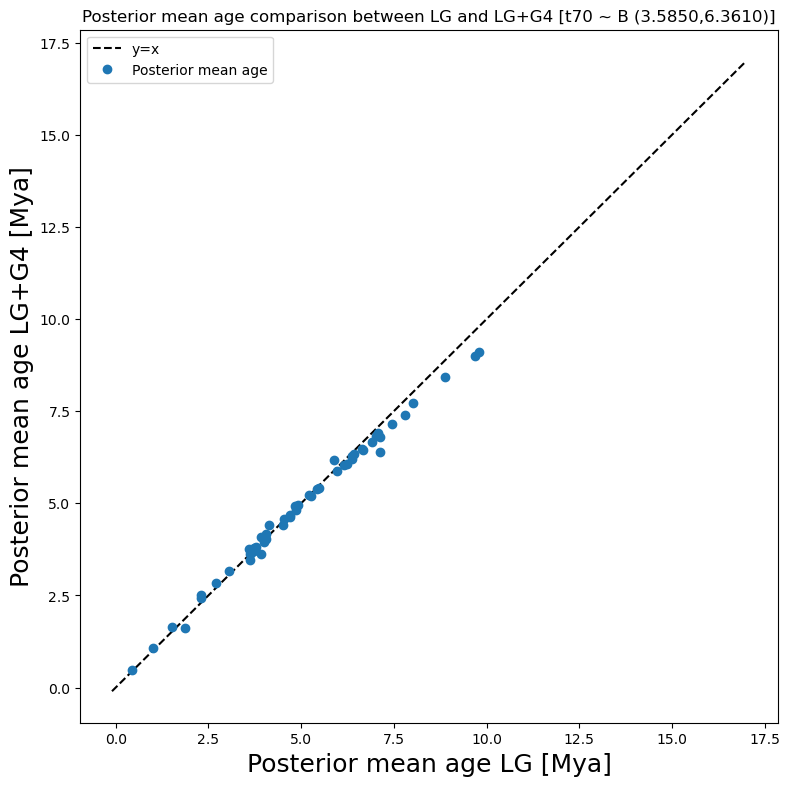

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t70 ~ B (3.5850,6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_cw_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')